In [130]:
import numpy as np
import pandas as pd

In [131]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Unique values

In [133]:
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')

Store: 45
Date: 143
Weekly_Sales: 6435
Holiday_Flag: 2
Temperature: 3528
Fuel_Price: 892
CPI: 2145
Unemployment: 349


In [134]:
df.describe().style.background_gradient(cmap = 'GnBu')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


### Highest weekly sales is 3818686.450000.

In [135]:
df.shape


(6435, 8)

### Feature Engineering

### The date is differentiated into day, Month and year for analysis.

In [136]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

/Users/priyakhandelwal/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


### Removing Outliers

In [137]:
num_features = ['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
for feature in num_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[feature] >= lower) & (df[feature] <= upper)]

### Model Building

In [138]:
x = df.drop(['Weekly_Sales'],axis=1)
y = df['Weekly_Sales']

### Standardized the data 

In [139]:
from sklearn.preprocessing import StandardScaler  
st = StandardScaler()
x_scaled = st.fit_transform(x)

In [140]:
from sklearn.model_selection import train_test_split, GridSearchCV 
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 42)

In [141]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [142]:
def model(model):
    
    y_test,y_train,x_test,x_train
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
  
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [143]:
def tune_and_evaluate(model,param_grid):
    
    '''This function recieves a model then tune it using GridSearch 
    then print the best parameters and return the best estimator'''
    
    # tunning the model
    grid_search = GridSearchCV(estimator= model,param_grid= param_grid,cv=5,scoring='r2')
    grid_search.fit(x_train,y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    # Make predictions on the test set
    y_pred = best_estimator.predict(x_test)

    best_score = grid_search.best_score_
    print("Best parameters are: ",best_params)
    print('Mean cross-validated score of the best_estimator is: ',best_score)
    print('-------------------------------------------------------------------')
    
    # best estimator evaluation
    print("Training set Accuracy:",round(best_estimator.score(x_train,y_train),3)*100)
    print("Test set Accuracy:",round(best_estimator.score(x_test,y_test),3)*100)

    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')
    
    import matplotlib.pyplot as plt
    import numpy as np
    # Assuming you have actual and predicted values in two arrays or lists
    actual_values = y_test
    predicted_values = y_pred

    # Create a scatter plot
    plt.figure(figsize=(15, 10))

    plt.scatter(actual_values, predicted_values, alpha=0.5)

    # Add a diagonal line for reference (y=x)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--')

    # Add labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of Actual vs. Predicted Values')

    # Display the plot
    plt.show()


### Random Forest Model

In [144]:
model(RandomForestRegressor)

MSE: 13798199999.281712
MAE: 65269.98489940928
R2 : 95.46 %


Best parameters are:  {'max_depth': 14, 'n_estimators': 100}
Mean cross-validated score of the best_estimator is:  0.9557886816026896
-------------------------------------------------------------------
Training set Accuracy: 99.1
Test set Accuracy: 95.39999999999999
MSE: 14018027812.408718
MAE: 66664.07194680128
R2 : 95.39 %


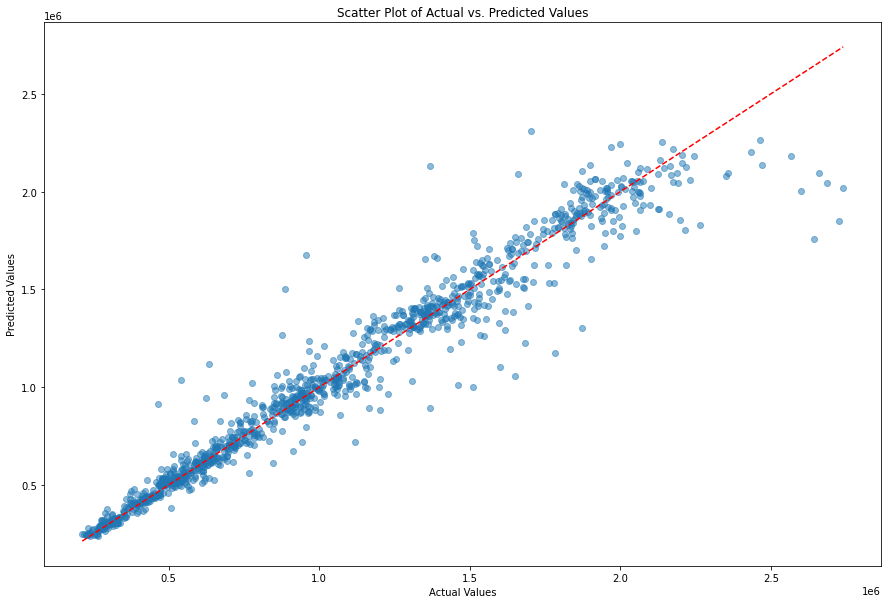

In [145]:
# Random Forest With gridsearch and hyperparameter tuning 
random_forest = RandomForestRegressor(n_jobs=-1)

# hyperparameter tunning
param_grid = {
    'max_depth': np.arange(2,15),
    'n_estimators': np.arange(25,101,25)
}
random_forest = tune_and_evaluate(random_forest,param_grid)

## Linear Regression 

In [147]:
model(LinearRegression)

MSE: 257002398384.23465
MAE: 421599.43519273883
R2 : 15.45 %


Best parameters are:  {'polynomialfeatures__degree': 3}
Mean cross-validated score of the best_estimator is:  0.3476946490696894
-------------------------------------------------------------------
Training set Accuracy: 43.1
Test set Accuracy: 38.800000000000004
MSE: 185934608771.1479
MAE: 349972.3237805907
R2 : 38.83 %


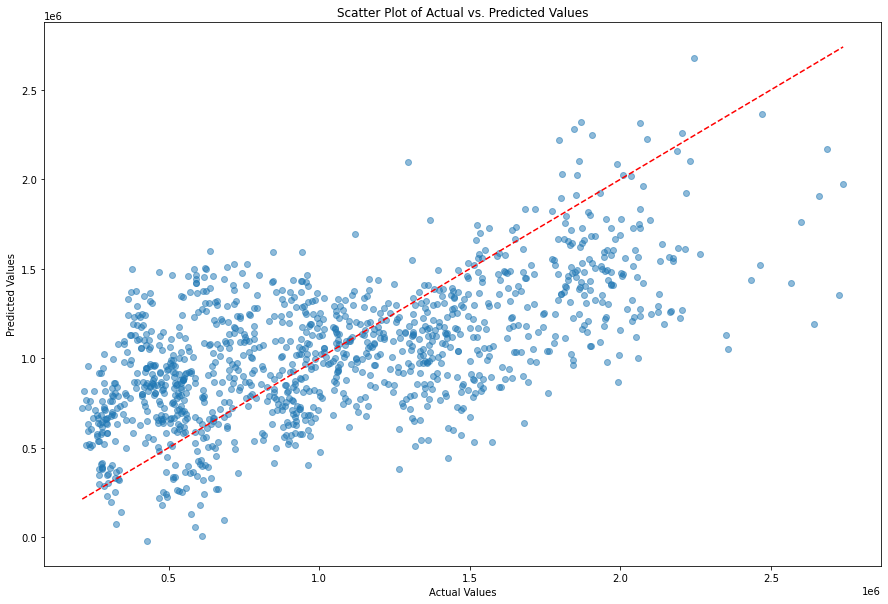

In [148]:
# With gridsearch and hyperparameter tunning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures 

# building the model
lin_reg = make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
)

param_grid = {'polynomialfeatures__degree':[2,3,4]}
lin_reg = tune_and_evaluate(lin_reg,param_grid)

## Gradient Boosting 

In [149]:
model(GradientBoostingRegressor)

MSE: 27562364717.25528
MAE: 123013.92898795026
R2 : 90.93 %


Best parameters are:  {'max_depth': 6, 'n_estimators': 200}
Mean cross-validated score of the best_estimator is:  0.9737938081362773
-------------------------------------------------------------------
Training set Accuracy: 99.6
Test set Accuracy: 97.5
MSE: 7620930904.314626
MAE: 51628.342778996994
R2 : 97.49 %


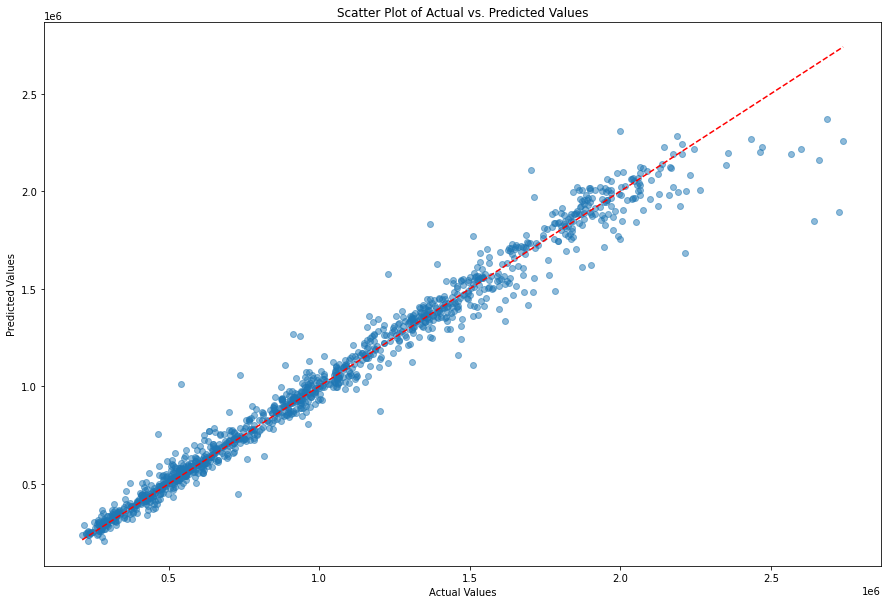

In [150]:
# building the model with hyperparameter tunning
gb = GradientBoostingRegressor()

# hyperparameter tunning
param_grid = {
    'max_depth': np.arange(2,10),
    'n_estimators': np.arange(20,201,20)
}
gb = tune_and_evaluate(gb,param_grid)

## XGBoost

In [151]:
from xgboost import XGBRegressor
import xgboost as xgb


In [152]:
xgbr = XGBRegressor(n_estimators = 1000, random_state = 1)
dtrain = xgb.DMatrix(x_train, label=y_train)


In [153]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

In [154]:
model = xgb.train(params, dtrain)



[14:12:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [159]:
# # Assuming X_test is your testing features
# dtest = xgb.DMatrix(x_test)
# y_pred = model.predict(dtest)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')
# print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
# print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

Best parameters are:  {'max_depth': 5, 'n_estimators': 180}
Mean cross-validated score of the best_estimator is:  0.9752168636564219
-------------------------------------------------------------------
Training set Accuracy: 99.7
Test set Accuracy: 97.6
MSE: 7189589388.471861
MAE: 51626.36230537974
R2 : 97.63 %


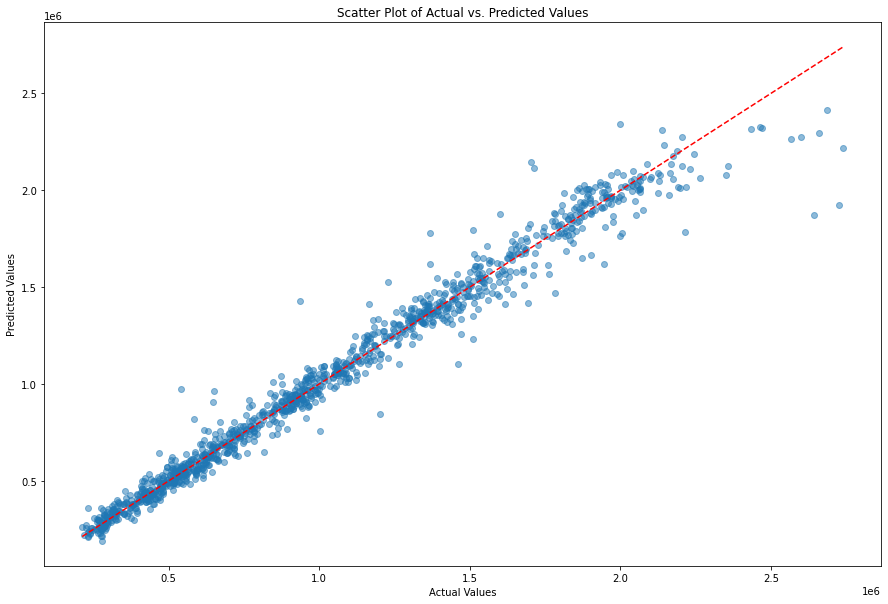

In [156]:
# building the model
xgb = XGBRegressor(n_jobs=-1)

# hyperparameter tunning
param_grid = {
    'max_depth': np.arange(2,10),
    'n_estimators': np.arange(20,201,20)
}
xgb = tune_and_evaluate(xgb,param_grid)

In [157]:
np.arange(2,15)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [158]:

np.arange(25,101,25)

array([ 25,  50,  75, 100])